Project Milestone 2 - Data Exploration

In [20]:
import json
import matplotlib.pyplot as plt
from nltk.tokenize import TreebankWordTokenizer
from collections import defaultdict

Open our dataset sample json file, which was created using the file in our github repository: /dataset/dataset_builder.py

In [4]:
with open("db.json", "r") as f:
    dataset = json.load(f)

In [17]:
nyc = "https://en.wikipedia.org/wiki/New_York_City"
info = dataset[nyc]
print("*********", info['city_name'], "*********")
print("Population", info['population'])
print("Population Density", info['population_density'])
print("Contains", len(info['text']), "paragraphs of raw downloaded text from Wikipedia")
for i in range(4):
    print("Paragraph", i+1, ":")
    print(info['text'][i])
print("\n\n\n")

********* New York City *********
Population 8336817
Population Density 28317
Contains 197 paragraphs of raw downloaded text from Wikipedia
Paragraph 1 :
[]
Paragraph 2 :
['new', 'york', 'city', '(', 'nyc', ')', ',', 'often', 'simply', 'called', 'new', 'york', ',', 'is', 'the', 'most', 'populous', 'city', 'in', 'the', 'united', 'states.', 'with', 'an', 'estimated', '2019', 'population', 'of', '8,336,817', 'distributed', 'over', 'about', '302.6', 'square', 'miles', '(', '784', 'km2', ')', ',', 'new', 'york', 'city', 'is', 'also', 'the', 'most', 'densely', 'populated', 'major', 'city', 'in', 'the', 'united', 'states.', '[', '11', ']', 'located', 'at', 'the', 'southern', 'tip', 'of', 'the', 'state', 'of', 'new', 'york', ',', 'the', 'city', 'is', 'the', 'center', 'of', 'the', 'new', 'york', 'metropolitan', 'area', ',', 'the', 'largest', 'metropolitan', 'area', 'in', 'the', 'world', 'by', 'urban', 'landmass.', '[', '12', ']', 'with', 'almost', '20', 'million', 'people', 'in', 'its', 'metrop

In [15]:
# Tokenize the paragraphs
tokenizer = TreebankWordTokenizer()
for url, info in dataset.items():
    for i in range(len(info['text'])):
        raw = info['text'][i]
        tokenized = tokenizer.tokenize(raw.lower())
        info['text'][i] = tokenized

In [19]:
print(dataset[nyc]['text'][1])

['new', 'york', 'city', '(', 'nyc', ')', ',', 'often', 'simply', 'called', 'new', 'york', ',', 'is', 'the', 'most', 'populous', 'city', 'in', 'the', 'united', 'states.', 'with', 'an', 'estimated', '2019', 'population', 'of', '8,336,817', 'distributed', 'over', 'about', '302.6', 'square', 'miles', '(', '784', 'km2', ')', ',', 'new', 'york', 'city', 'is', 'also', 'the', 'most', 'densely', 'populated', 'major', 'city', 'in', 'the', 'united', 'states.', '[', '11', ']', 'located', 'at', 'the', 'southern', 'tip', 'of', 'the', 'state', 'of', 'new', 'york', ',', 'the', 'city', 'is', 'the', 'center', 'of', 'the', 'new', 'york', 'metropolitan', 'area', ',', 'the', 'largest', 'metropolitan', 'area', 'in', 'the', 'world', 'by', 'urban', 'landmass.', '[', '12', ']', 'with', 'almost', '20', 'million', 'people', 'in', 'its', 'metropolitan', 'statistical', 'area', 'and', 'approximately', '23', 'million', 'in', 'its', 'combined', 'statistical', 'area', ',', 'it', 'is', 'one', 'of', 'the', 'world', "'s"

In [23]:
tf = defaultdict(int)
for url, info in dataset.items():
    for par in info['text']:
        for token in par:
            tf[token] += 1

In [40]:
print("Top 20 tokens by term frequency")
unsorted_tf = [(term, freq) for term, freq in tf.items()]
sorted_tf = sorted(unsorted_tf, key=lambda x: x[1], reverse=True)
for i in range(20):
    print(sorted_tf[i][0], sorted_tf[i][1])

Top 20 tokens by term frequency
the 9741
, 8363
of 4347
in 3867
and 3817
[ 3211
] 3211
to 1842
a 1612
city 1573
( 1361
) 1360
is 1327
's 1105
as 943
was 788
by 736
. 712
for 703
new 682


In [30]:
print("Bottom 10 tokens by term frequency")
for i in range(10):
    print(sorted_tf[len(sorted_tf)-1-i])

Bottom 10 tokens by term frequency
('p', 1)
('terminates', 1)
('tiger', 1)
('viaduct.', 1)
('envisioning', 1)
('facility.', 1)
('desired', 1)
('skylink', 1)
('check-in', 1)
('proceeding', 1)


<BarContainer object of 300 artists>

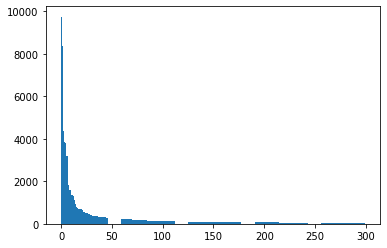

In [45]:
plt.bar(x=[i for i in range(300)], height=[x[1] for x in sorted_tf[:300]])

In [51]:
tf_by_city = {}
for url, info in dataset.items():
    d = defaultdict(int)
    for par in info['text']:
        for tok in par:
            d[tok] += 1
    tf_by_city[info['city_name']] = d

In [58]:
for city_name, tf_dict in tf_by_city.items():
    print("*****", city_name, "*****")
    sorted_tf = sorted([(term, freq) for term,freq in tf_dict.items()], key=lambda x: x[1], reverse=True)
    for i in range(35,45):
        print(sorted_tf[i])

***** New York City *****
('island', 61)
('%', 61)
('which', 57)
('states', 57)
('its', 52)
('population', 51)
('american', 51)
('more', 49)
('an', 48)
('one', 47)
***** Los Angeles *****
('united', 25)
('population', 24)
('it', 24)
('world', 23)
('largest', 21)
('that', 21)
('were', 21)
('center', 21)
(':', 20)
('metropolitan', 20)
***** Chicago *****
('university', 44)
('an', 43)
('that', 43)
('including', 42)
('school', 42)
('it', 41)
('one', 41)
('``', 41)
("''", 41)
('new', 39)
***** Houston *****
(';', 37)
('an', 35)
('or', 35)
('were', 35)
('downtown', 35)
('states', 33)
('its', 33)
('``', 33)
("''", 33)
('major', 33)
***** Phoenix, Arizona *****
(';', 39)
('other', 38)
('area', 37)
('over', 37)
('one', 36)
('an', 36)
('were', 36)
('first', 36)
('that', 35)
('valley', 34)
***** Philadelphia *****
(';', 38)
('street', 38)
('largest', 37)
('are', 37)
('also', 36)
('american', 36)
('delaware', 34)
('population', 33)
('states', 31)
('its', 31)
***** San Antonio *****
('``', 29)
('u.